# Reaction Time (RT) Analysis by Modality

This notebook analyzes reaction times (RT) recorded during a single trial experiment. Missing responses (coded as RT = -1) have been excluded from analysis.

---

### In this notebook:
- Data cleaning
- Summary statistics per modality
- RT distribution visualizations


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("../res/expdata/trials/subject_14.csv")
df['RT'] = np.where(df['RT'] == -1, np.nan, df['RT'])

# Drop missing RTs for analysis
df_clean = df.dropna(subset=['RT'])

df_clean.head()

,target,modality,RT
2,68-scenes\castle-68\FreeFoto_castle_3_9.jpg,high,4.508237
3,68-scenes\library-68\inside01.jpg,medium,4.157117
4,68-scenes\temple-68\shwezigon-temple-500.jpg,medium,3.834885
5,68-scenes\library-68\librairie-16.jpg,high,3.499342
6,68-scenes\castle-68\FreeFoto_castle_1_22.jpg,low,3.153949


## Summary Statistics of RT by Modality

In [2]:
# Compute mean, median, std, and count
modality_order = ['high', 'medium', 'medium-low', 'medium', 'low', 'control']
df_ordered = (
    df_clean.groupby('modality')['RT']
    .agg(['count', 'mean', 'median', 'std'])
    .reindex(modality_order)
)
df_ordered

,count,mean,median,std
modality,,,,
high,6,3.123326,2.994936,0.814927
medium,6,3.782482,3.862747,0.575471
medium-low,6,3.616684,3.431356,0.575956
medium,6,3.782482,3.862747,0.575471
low,5,2.506831,2.493448,0.508763
control,5,3.067903,2.930748,0.665421


## RT Distribution by Modality

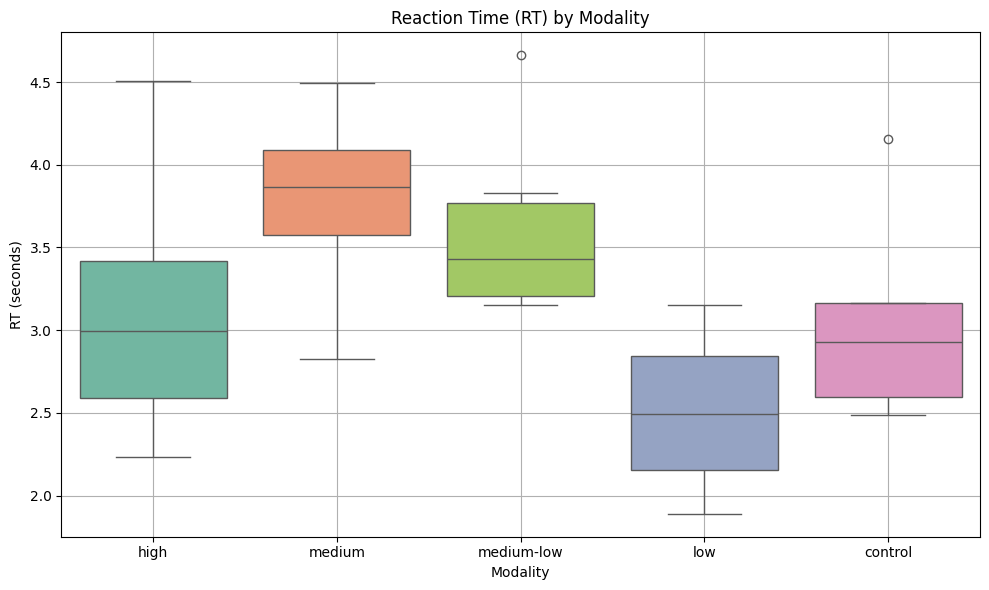

In [3]:
modality_order = ['high', 'medium', 'medium-low', 'low', 'control']
palette = sns.color_palette("Set2", n_colors=len(modality_order))

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x='modality',
    y='RT',
    hue='modality',          # add this to link colors to modality
    order=modality_order,
    palette=palette,
    dodge=False,             # prevent duplicated boxes
    legend=False             # hide redundant legend
)
plt.title("Reaction Time (RT) by Modality")
plt.ylabel("RT (seconds)")
plt.xlabel("Modality")
plt.grid(True)
plt.tight_layout()
plt.show()

## Kruskal-Wallis Test

We performed a Mann-Whitney U test to assess whether the RT distributions differ significantly across modalities.

In [4]:
# Import combinations (previously used, but not in this active kernel)
from itertools import combinations
from scipy.stats import mannwhitneyu

# Redo unpaired test using clean dataset
modalities = ['control', 'high', 'medium', 'medium-low', 'low']

unpaired_results = []
for mod1, mod2 in combinations(modalities, 2):
    group1 = df_clean[df_clean['modality'] == mod1]['RT'].dropna()
    group2 = df_clean[df_clean['modality'] == mod2]['RT'].dropna()
    if not group1.empty and not group2.empty:
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        unpaired_results.append((mod1, mod2, stat, p))

# Format results
unpaired_df = pd.DataFrame(unpaired_results, columns=["Modality 1", "Modality 2", "U-statistic", "p-value"])
unpaired_df["Significant (p < 0.05)"] = unpaired_df["p-value"] < 0.05
unpaired_df.sort_values("p-value", inplace=True)

unpaired_df


,Modality 1,Modality 2,U-statistic,p-value,Significant (p < 0.05)
9,medium-low,low,30.0,0.004329,True
8,medium,low,28.0,0.017316,True
2,control,medium-low,6.0,0.125541,False
1,control,medium,7.0,0.177489,False
6,high,low,23.0,0.177489,False
4,high,medium,9.0,0.179654,False
5,high,medium-low,9.0,0.179654,False
3,control,low,19.0,0.222222,False
7,medium,medium-low,23.0,0.484848,False
0,control,high,14.0,0.930736,False
